In [1]:
import pyforest
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv('lending_club_data01.csv')
data.head()

,int_rate,installment,open_acc,revol_bal,revol_util,total_acc,bad_loans,grade_num
0,10.65,162.87,3,13648,83.7,9,0,5
1,15.27,59.83,3,1687,9.4,4,1,4
2,15.96,84.33,2,2956,98.5,10,0,4
3,13.49,339.31,10,5598,21.0,37,0,4
4,7.90,156.46,9,7963,28.3,12,0,6


In [3]:
data.shape

(1468, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 8 columns):
int_rate       1468 non-null float64
installment    1468 non-null float64
open_acc       1468 non-null int64
revol_bal      1468 non-null int64
revol_util     1468 non-null float64
total_acc      1468 non-null int64
bad_loans      1468 non-null int64
grade_num      1468 non-null int64
dtypes: float64(3), int64(5)
memory usage: 91.8 KB


In [5]:
#sns.pairplot(data=data)

In [6]:
data.rename(columns={'bad_loans': 'good_loans'}, inplace=True)

In [7]:
data.head()

,int_rate,installment,open_acc,revol_bal,revol_util,total_acc,good_loans,grade_num
0,10.65,162.87,3,13648,83.7,9,0,5
1,15.27,59.83,3,1687,9.4,4,1,4
2,15.96,84.33,2,2956,98.5,10,0,4
3,13.49,339.31,10,5598,21.0,37,0,4
4,7.90,156.46,9,7963,28.3,12,0,6


In [8]:
#data['good_loans'] = data['good_loans'].apply(lambda y: 1 if y == 0 else 0)
#data.drop(['bad_loans'], axis=1, inplace=True)

for steps in data.good_loans:
    if data.loc[steps, 'good_loans'] == 0:
        data.loc[data['good_loans'] == steps,'good_loans'] = '1'
    elif data.loc[steps, 'good_loans'] == 1:
        data.loc[data['good_loans'] == steps,'good_loans'] = '0'

In [113]:
data.head()

,int_rate,installment,open_acc,revol_bal,revol_util,total_acc,good_loans,grade_num
0,10.65,162.87,3,13648,83.7,9,1,5
1,15.27,59.83,3,1687,9.4,4,0,4
2,15.96,84.33,2,2956,98.5,10,1,4
3,13.49,339.31,10,5598,21.0,37,1,4
4,7.90,156.46,9,7963,28.3,12,1,6


In [114]:
data['good_loans'] = data['good_loans'].astype(int)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 8 columns):
int_rate       1468 non-null float64
installment    1468 non-null float64
open_acc       1468 non-null int64
revol_bal      1468 non-null int64
revol_util     1468 non-null float64
total_acc      1468 non-null int64
good_loans     1468 non-null int32
grade_num      1468 non-null int64
dtypes: float64(3), int32(1), int64(4)
memory usage: 86.1 KB


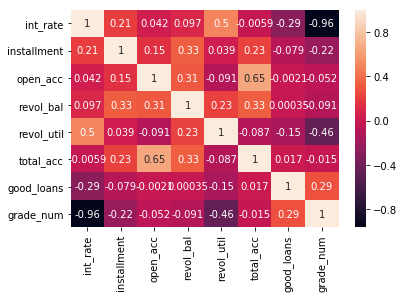

In [116]:
sns.heatmap(data.corr(), annot=True)

In [339]:
#sns.pairplot(data=data)

In [493]:
features = data[['installment', 'open_acc', 'revol_util' ,'revol_bal','total_acc', 'grade_num']]
label = data[['good_loans']]

In [494]:
features_train, features_test, label_train, label_test = train_test_split(features,label,test_size=0.1)

In [495]:
model = DecisionTreeClassifier()

In [496]:
model.fit(features_train, label_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [497]:
print(classification_report(label_test, model.predict(features_test)))

              precision    recall  f1-score   support

           0       0.19      0.32      0.24        22
           1       0.86      0.77      0.81       125

   micro avg       0.70      0.70      0.70       147
   macro avg       0.53      0.54      0.53       147
weighted avg       0.76      0.70      0.73       147



In [498]:
print(confusion_matrix(label_test, model.predict(features_test)))

[[ 7 15]
 [29 96]]


In [511]:
from sklearn.ensemble import RandomForestClassifier

In [514]:
model2 = RandomForestClassifier(n_estimators=300)

In [515]:
model2.fit(features_train,label_train)

C:\Users\mtcko\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [516]:
print(classification_report(label_test, model2.predict(features_test)))

              precision    recall  f1-score   support

           0       0.40      0.09      0.15        22
           1       0.86      0.98      0.91       125

   micro avg       0.84      0.84      0.84       147
   macro avg       0.63      0.53      0.53       147
weighted avg       0.79      0.84      0.80       147



In [528]:
data2 = pd.read_csv('lending_club_new_data.csv')

In [529]:
data2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,bad_loans,emp_length_num,grade_num,sub_grade_num,delinq_2yrs_zero,payment_inc_ratio
0,5000,5000,4975,10.65,162.87,24000,27.65,0,1,3,...,0.00,0.00,0.00,171.62,0,11,5,0.4,1,8.14350
1,2500,2500,2500,15.27,59.83,30000,1.00,0,5,3,...,0.00,117.08,1.11,119.66,1,1,4,0.8,1,2.39320
2,2400,2400,2400,15.96,84.33,12252,8.72,0,2,2,...,0.00,0.00,0.00,649.91,0,11,4,1.0,1,8.25955
3,10000,10000,10000,13.49,339.31,49200,20.00,0,1,10,...,16.97,0.00,0.00,357.48,0,11,4,0.2,1,8.27585
4,5000,5000,5000,7.90,156.46,36000,11.20,0,3,9,...,0.00,0.00,0.00,161.03,0,4,6,0.8,1,5.21533


In [532]:
data2.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'bad_loans',
       'emp_length_num', 'grade_num', 'sub_grade_num', 'delinq_2yrs_zero',
       'payment_inc_ratio'],
      dtype='object')

In [533]:
data2.rename(columns={'bad_loans':'good_loans'}, inplace=True)

In [534]:
for steps in data2.good_loans:
    if data2.loc[steps, 'good_loans'] == 0:
        data2.loc[data2['good_loans'] == steps,'good_loans'] = '1'
    elif data2.loc[steps, 'good_loans'] == 1:
        data2.loc[data2['good_loans'] == steps,'good_loans'] = '0'

In [535]:
data2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,good_loans,emp_length_num,grade_num,sub_grade_num,delinq_2yrs_zero,payment_inc_ratio
0,5000,5000,4975,10.65,162.87,24000,27.65,0,1,3,...,0.00,0.00,0.00,171.62,1,11,5,0.4,1,8.14350
1,2500,2500,2500,15.27,59.83,30000,1.00,0,5,3,...,0.00,117.08,1.11,119.66,0,1,4,0.8,1,2.39320
2,2400,2400,2400,15.96,84.33,12252,8.72,0,2,2,...,0.00,0.00,0.00,649.91,1,11,4,1.0,1,8.25955
3,10000,10000,10000,13.49,339.31,49200,20.00,0,1,10,...,16.97,0.00,0.00,357.48,1,11,4,0.2,1,8.27585
4,5000,5000,5000,7.90,156.46,36000,11.20,0,3,9,...,0.00,0.00,0.00,161.03,1,4,6,0.8,1,5.21533


In [536]:
data2['good_loans'] = data2['good_loans'].astype(int)

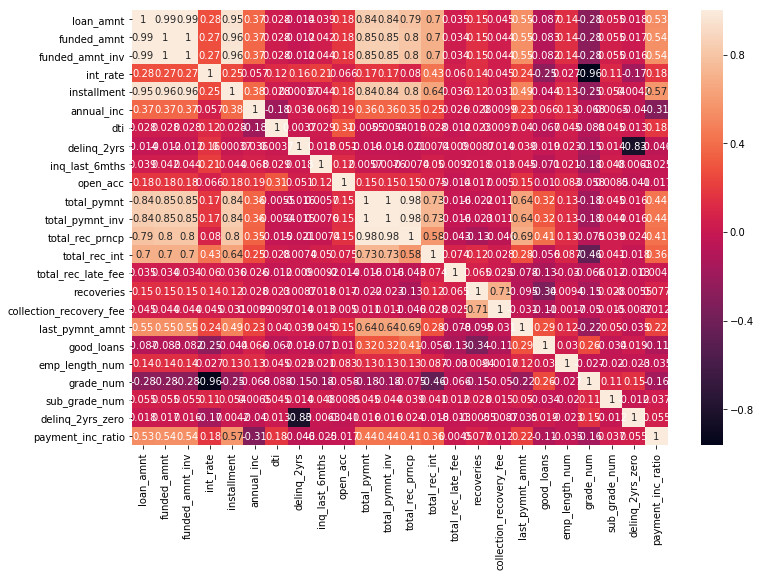

In [540]:
plt.figure(figsize=(12,8))
sns.heatmap(data2.corr(), annot=True)

In [601]:
features2 = data2[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries','collection_recovery_fee', 'last_pymnt_amnt',
       'emp_length_num', 'grade_num', 'sub_grade_num', 'delinq_2yrs_zero','payment_inc_ratio']]
label2 = data2[['good_loans']]

In [602]:
features_train2, features_test2, label_train2, label_test2 = train_test_split(features2,label2,test_size=0.1)

In [603]:
model3 = DecisionTreeClassifier()

In [604]:
model3.fit(features_train2,label_train2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [605]:
print(classification_report(label_test2, model3.predict(features_test2)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       135
           1       1.00      1.00      1.00       817

   micro avg       1.00      1.00      1.00       952
   macro avg       1.00      1.00      1.00       952
weighted avg       1.00      1.00      1.00       952



In [606]:
print(confusion_matrix(label_test2, model3.predict(features_test2)))

[[134   1]
 [  1 816]]
